# Unsupervised learning: clustering

In [1]:
# importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

In [2]:
# reading the data
data = pd.read_csv('winequality-white.csv', sep= ';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Analysis

In [3]:
# value counts for each features
def count(features):
    for feature in features:
        print(data[feature].value_counts())

In [4]:
count(data.columns)

fixed acidity
6.8     308
6.6     290
6.4     280
6.9     241
6.7     236
       ... 
4.5       1
4.6       1
11.8      1
14.2      1
3.9       1
Name: count, Length: 68, dtype: int64
volatile acidity
0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
0.545      1
0.135      1
0.905      1
0.685      1
0.355      1
Name: count, Length: 125, dtype: int64
citric acid
0.30    307
0.28    282
0.32    257
0.34    225
0.29    223
       ... 
1.66      1
1.23      1
0.86      1
0.11      1
0.99      1
Name: count, Length: 87, dtype: int64
residual sugar
1.20     187
1.40     184
1.60     165
1.30     147
1.10     146
        ... 
6.75       1
12.75      1
8.55       1
4.35       1
18.40      1
Name: count, Length: 310, dtype: int64
chlorides
0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.217      1
0.148      1
0.158      1
0.099      1
0.136      1
Name: count, Length: 160, dtype: int64
free sulfur dioxide
29.0     160
31.0     132


In [5]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
# Box plot for each features to check for outliers in the data
def plot():
    for feature in data.columns:
        plt.figure(figsize=(10, 5))
        plt.boxplot(data[feature])
        plt.xlabel(feature)
        plt.show()

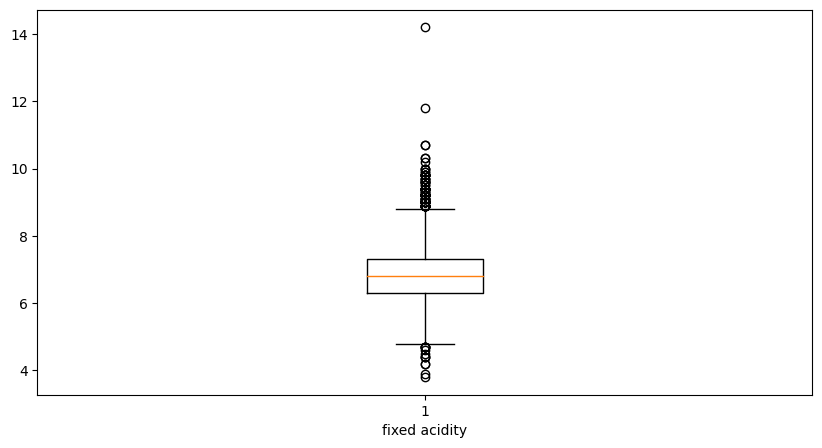

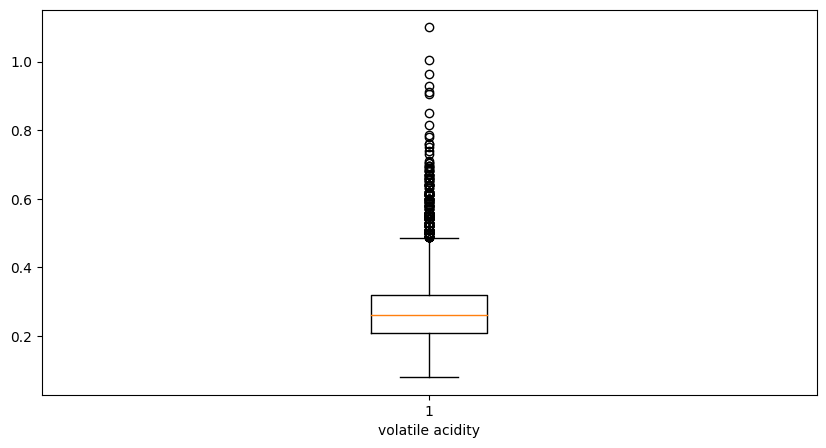

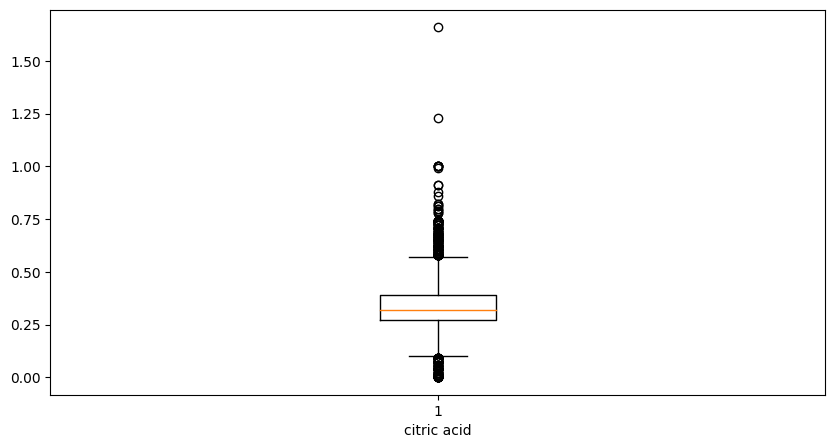

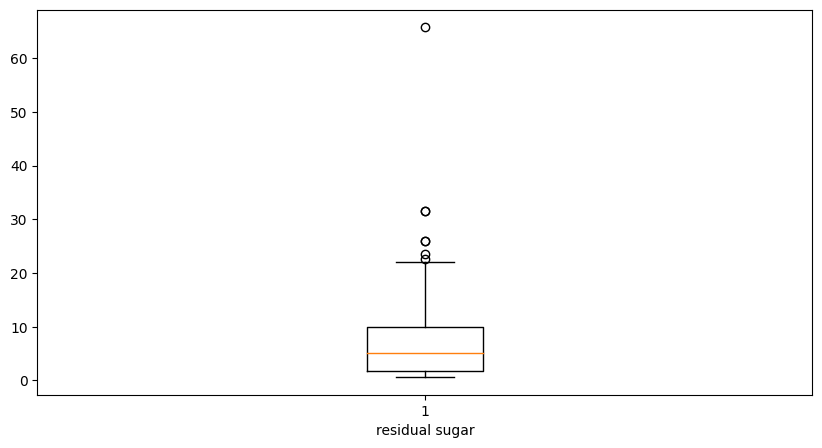

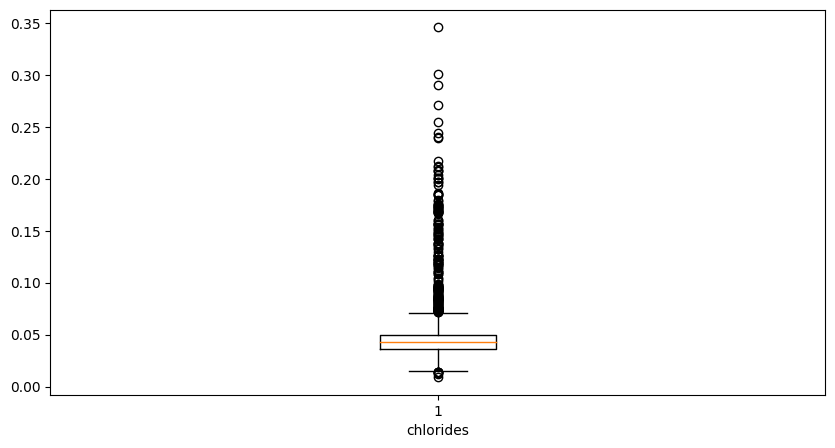

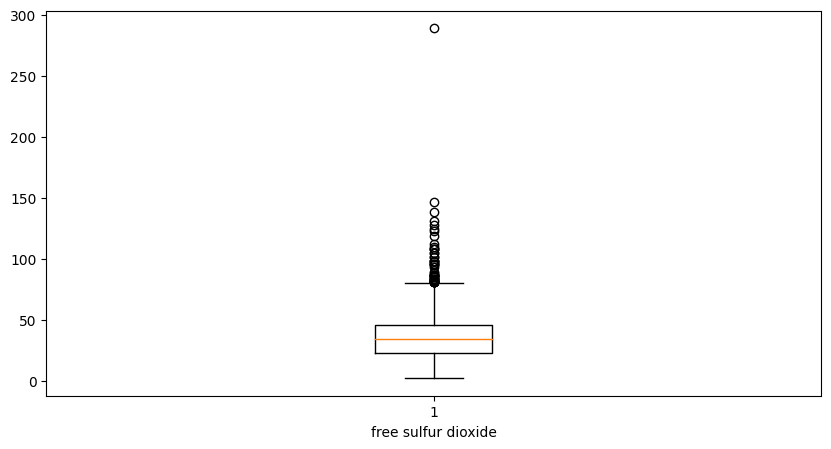

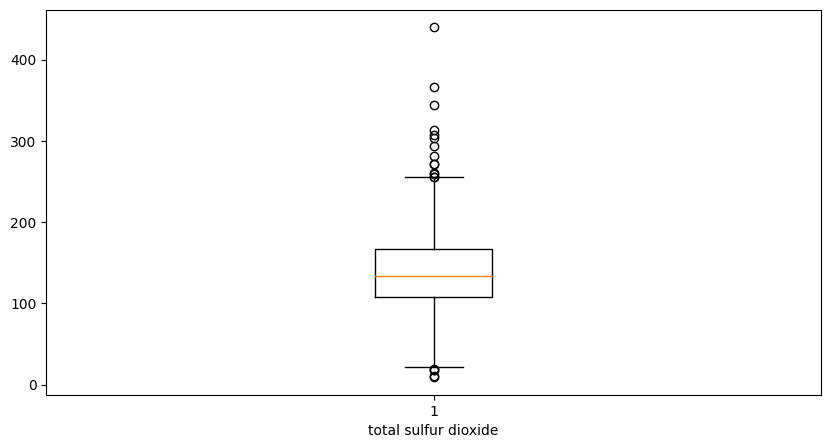

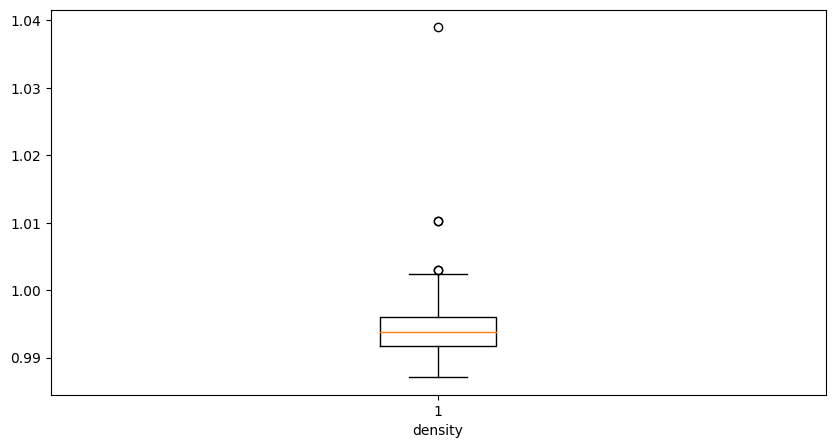

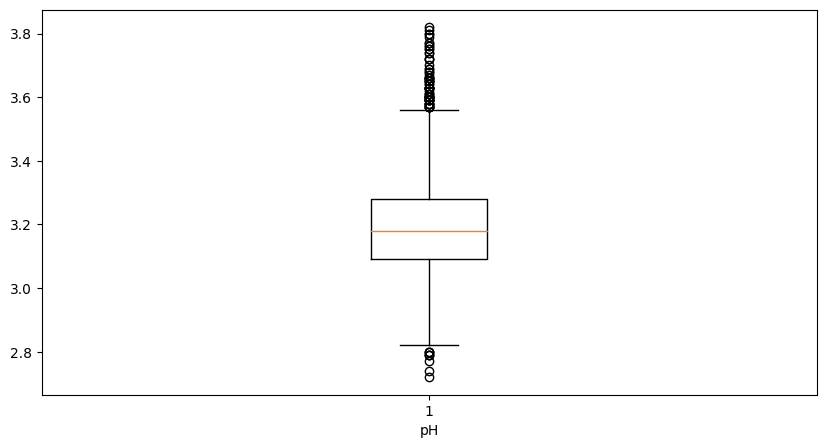

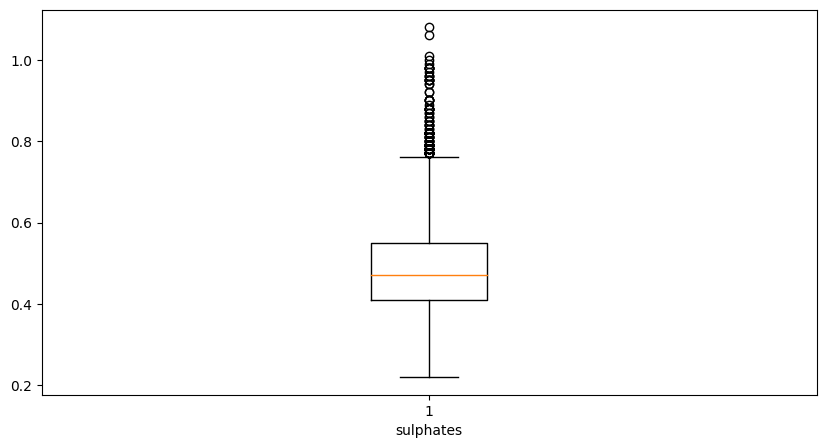

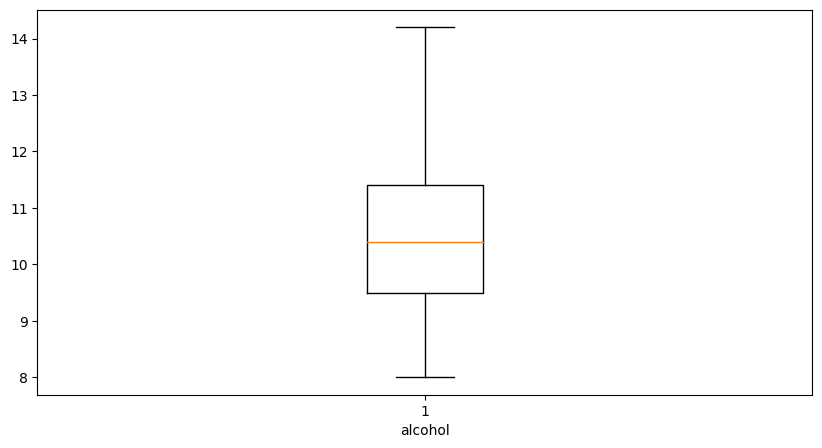

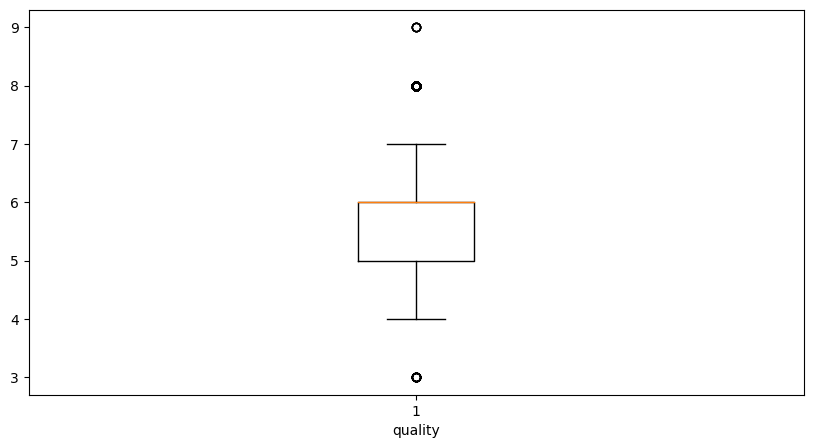

In [7]:
plot()

In [8]:
# fixing outliers in the individual features
def fix(features):
    for feature in features:
        lower_limit = np.percentile(data[feature], 10)
        upper_limit = np.percentile(data[feature], 90)
        
        data[feature] = np.where(data[feature] < lower_limit, lower_limit, data[feature])
        data[feature] = np.where(data[feature] > upper_limit, upper_limit, data[feature])
        
    return data

In [9]:
# Getting all the feature name without the target.
col = [i for i in data.columns if i != 'quality']
data = fix(col)

In [10]:
# Getting the data after fixing the outlier in the features
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,14.0,0.045,45.0,170.0,0.998150,3.00,0.45,9.0,6
1,6.3,0.30,0.34,1.6,0.049,15.0,132.0,0.994000,3.30,0.49,9.5,6
2,7.9,0.28,0.40,6.9,0.050,30.0,97.0,0.995100,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.995600,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.995600,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.991140,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.994900,3.15,0.46,9.6,5
4895,6.5,0.24,0.22,1.2,0.041,30.0,111.0,0.992540,3.00,0.46,9.4,6
4896,5.9,0.29,0.30,1.2,0.030,20.0,110.0,0.990327,3.34,0.38,12.4,7


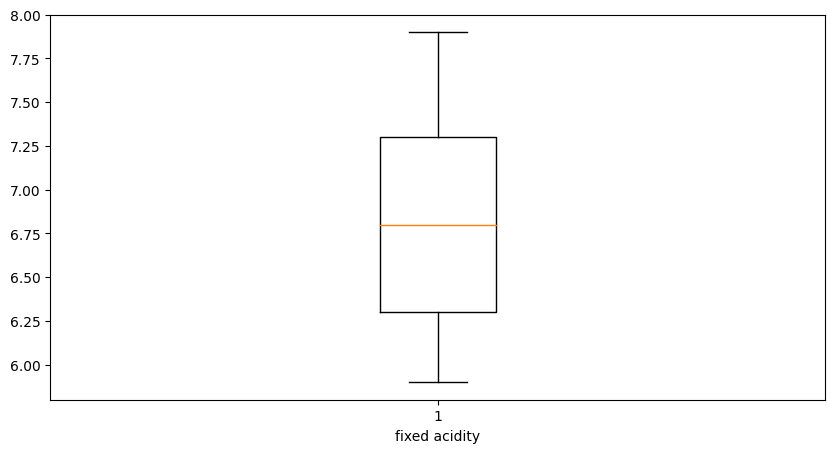

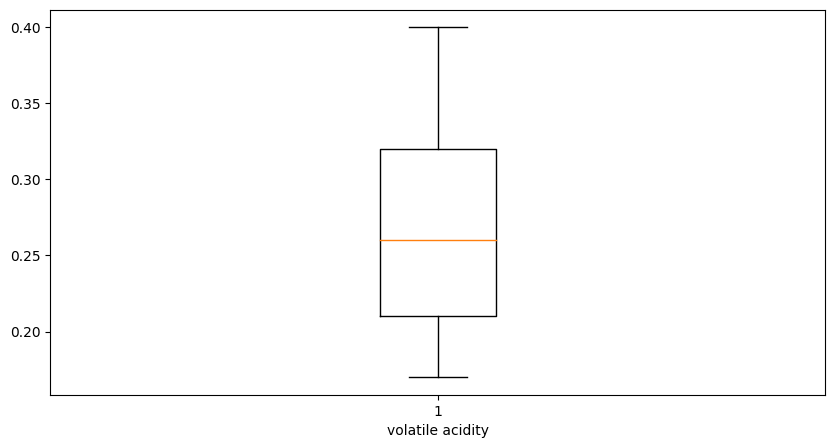

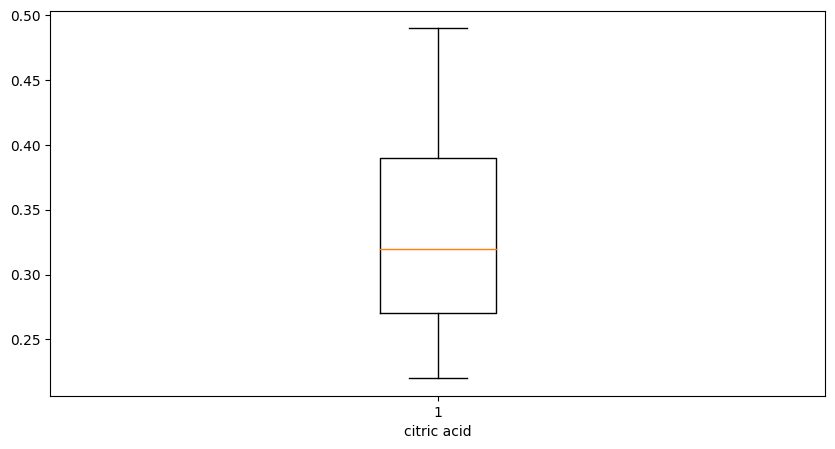

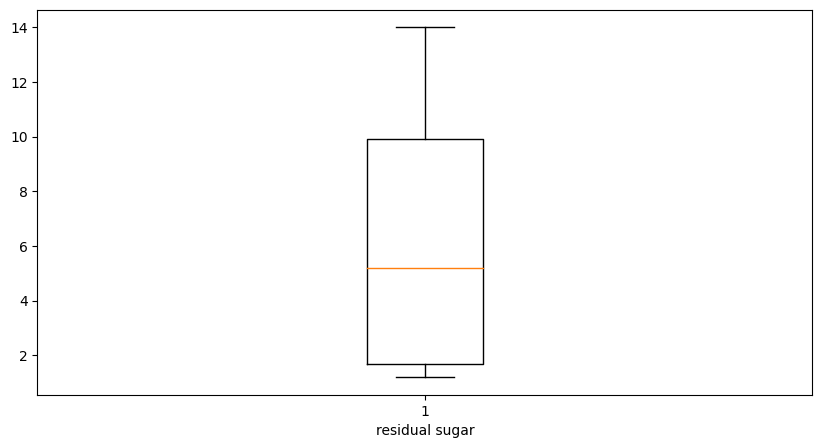

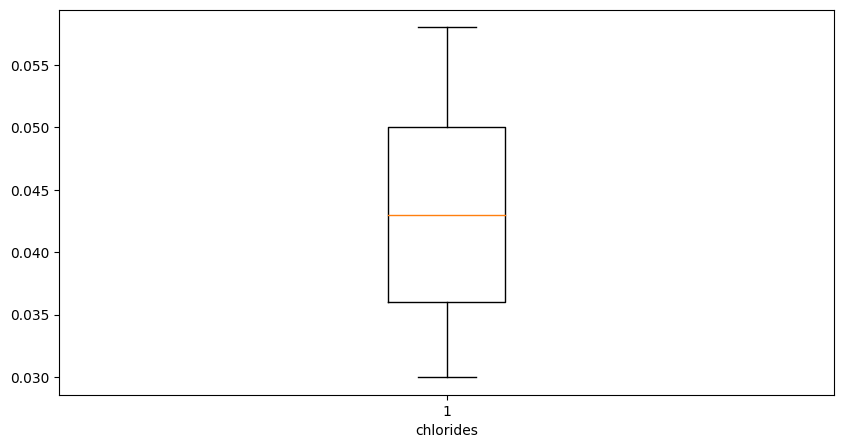

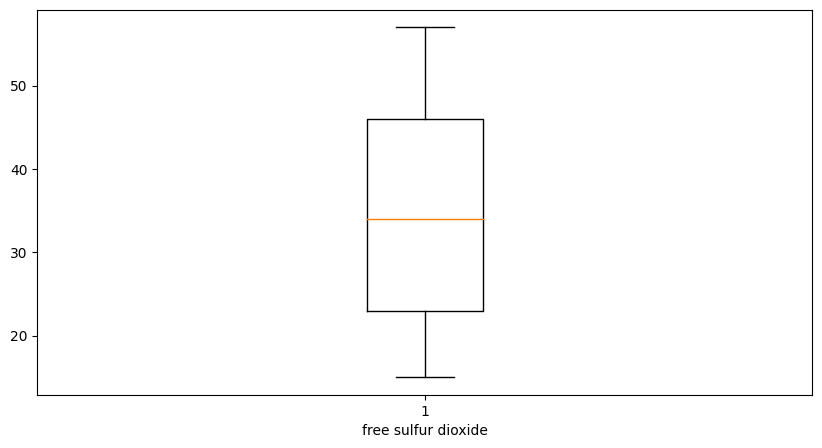

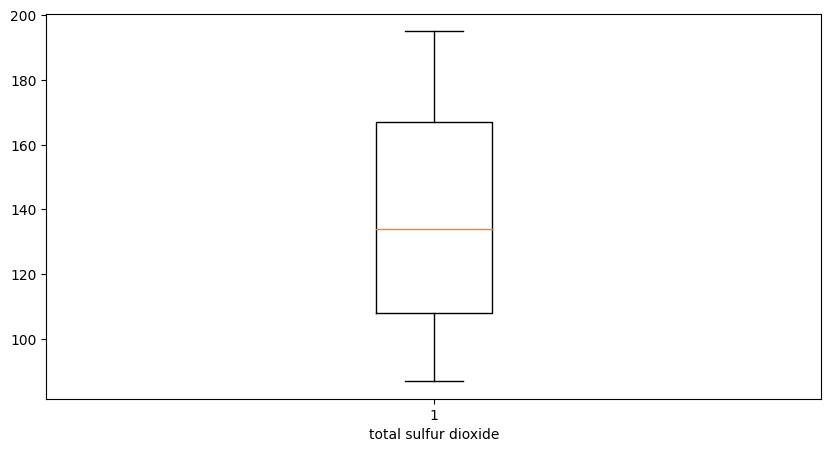

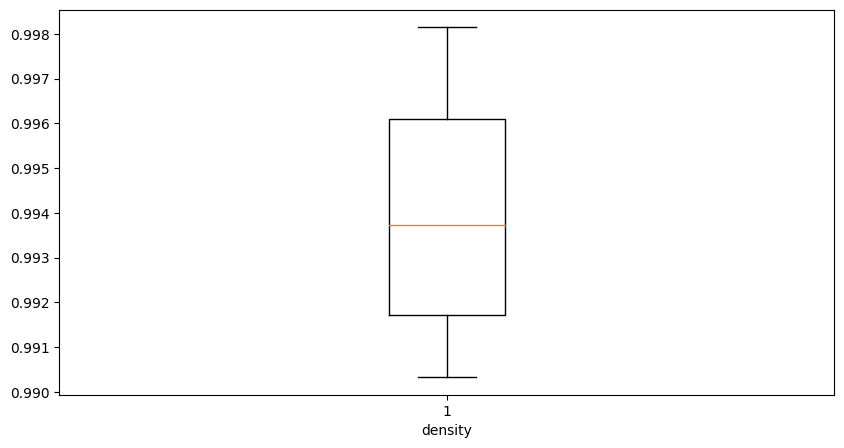

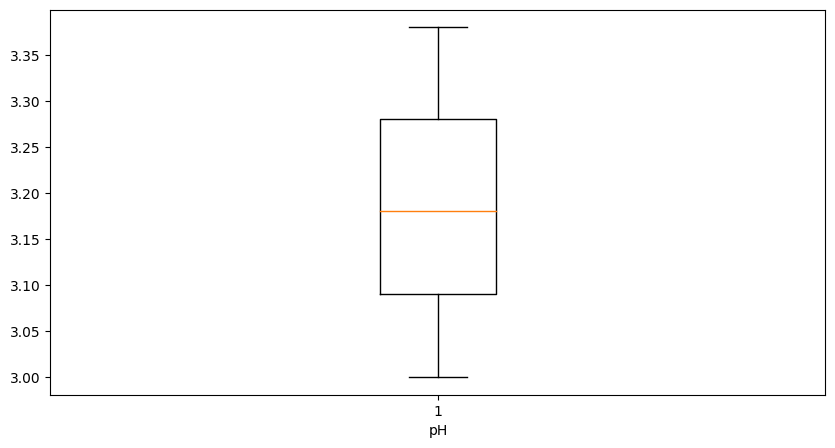

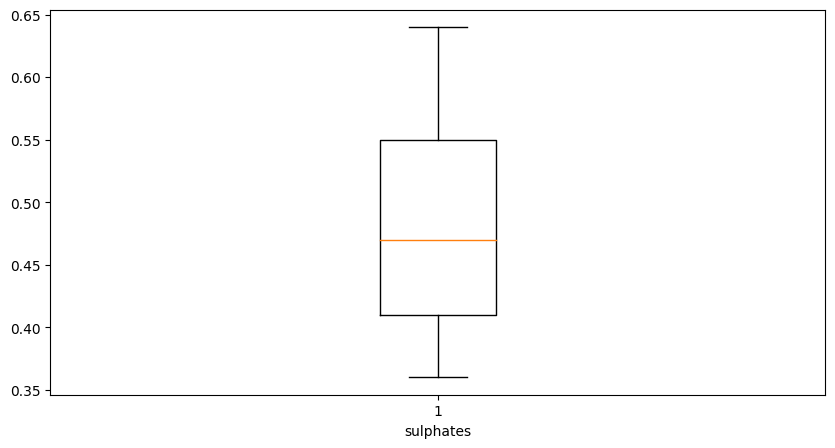

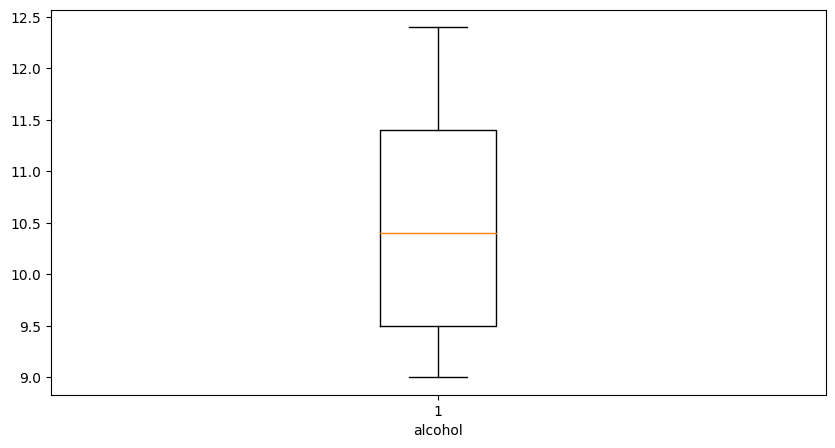

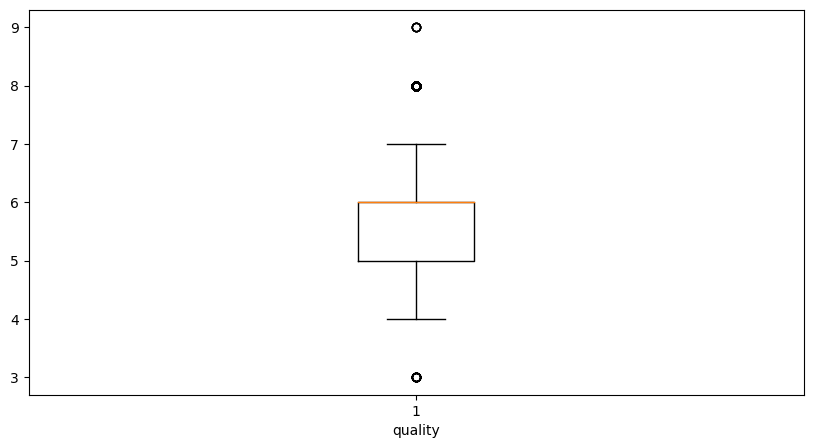

In [11]:
# boxplot for the features after fixing the outliers
plot()

In [12]:
# value count for features after fixing the outliers
count(data.columns)

fixed acidity
5.90    574
7.90    548
6.80    308
6.60    290
6.40    280
6.90    241
6.70    236
7.00    232
6.50    225
7.20    206
7.10    200
7.40    194
6.20    192
6.30    188
6.00    184
7.30    178
6.10    155
7.60    153
7.50    123
7.80     93
7.70     93
6.15      2
7.15      2
6.45      1
Name: count, dtype: int64
volatile acidity
0.170    552
0.400    524
0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
0.270    218
0.230    216
0.200    214
0.300    198
0.210    191
0.320    182
0.180    177
0.190    170
0.290    160
0.310    148
0.340    135
0.330    134
0.360    104
0.350     86
0.370     65
0.380     63
0.390     61
0.255     10
0.345      9
0.335      7
0.265      5
0.285      5
0.185      5
0.205      4
0.315      4
0.305      4
0.225      4
0.235      4
0.245      4
0.275      3
0.295      3
0.395      2
0.325      2
0.385      2
0.365      2
0.375      2
0.175      1
0.215      1
0.355      1
Name: count, dtype: int64
citric acid
0.22    583
0.49   

In [13]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,14.0,0.045,45.0,170.0,0.998150,3.00,0.45,9.0,6
1,6.3,0.30,0.34,1.6,0.049,15.0,132.0,0.994000,3.30,0.49,9.5,6
2,7.9,0.28,0.40,6.9,0.050,30.0,97.0,0.995100,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.995600,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.995600,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.991140,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.994900,3.15,0.46,9.6,5
4895,6.5,0.24,0.22,1.2,0.041,30.0,111.0,0.992540,3.00,0.46,9.4,6
4896,5.9,0.29,0.30,1.2,0.030,20.0,110.0,0.990327,3.34,0.38,12.4,7


In [14]:
def corr():
    plt.figure(figsize=(20, 20))
    sn.heatmap(data.corr(), annot= True)

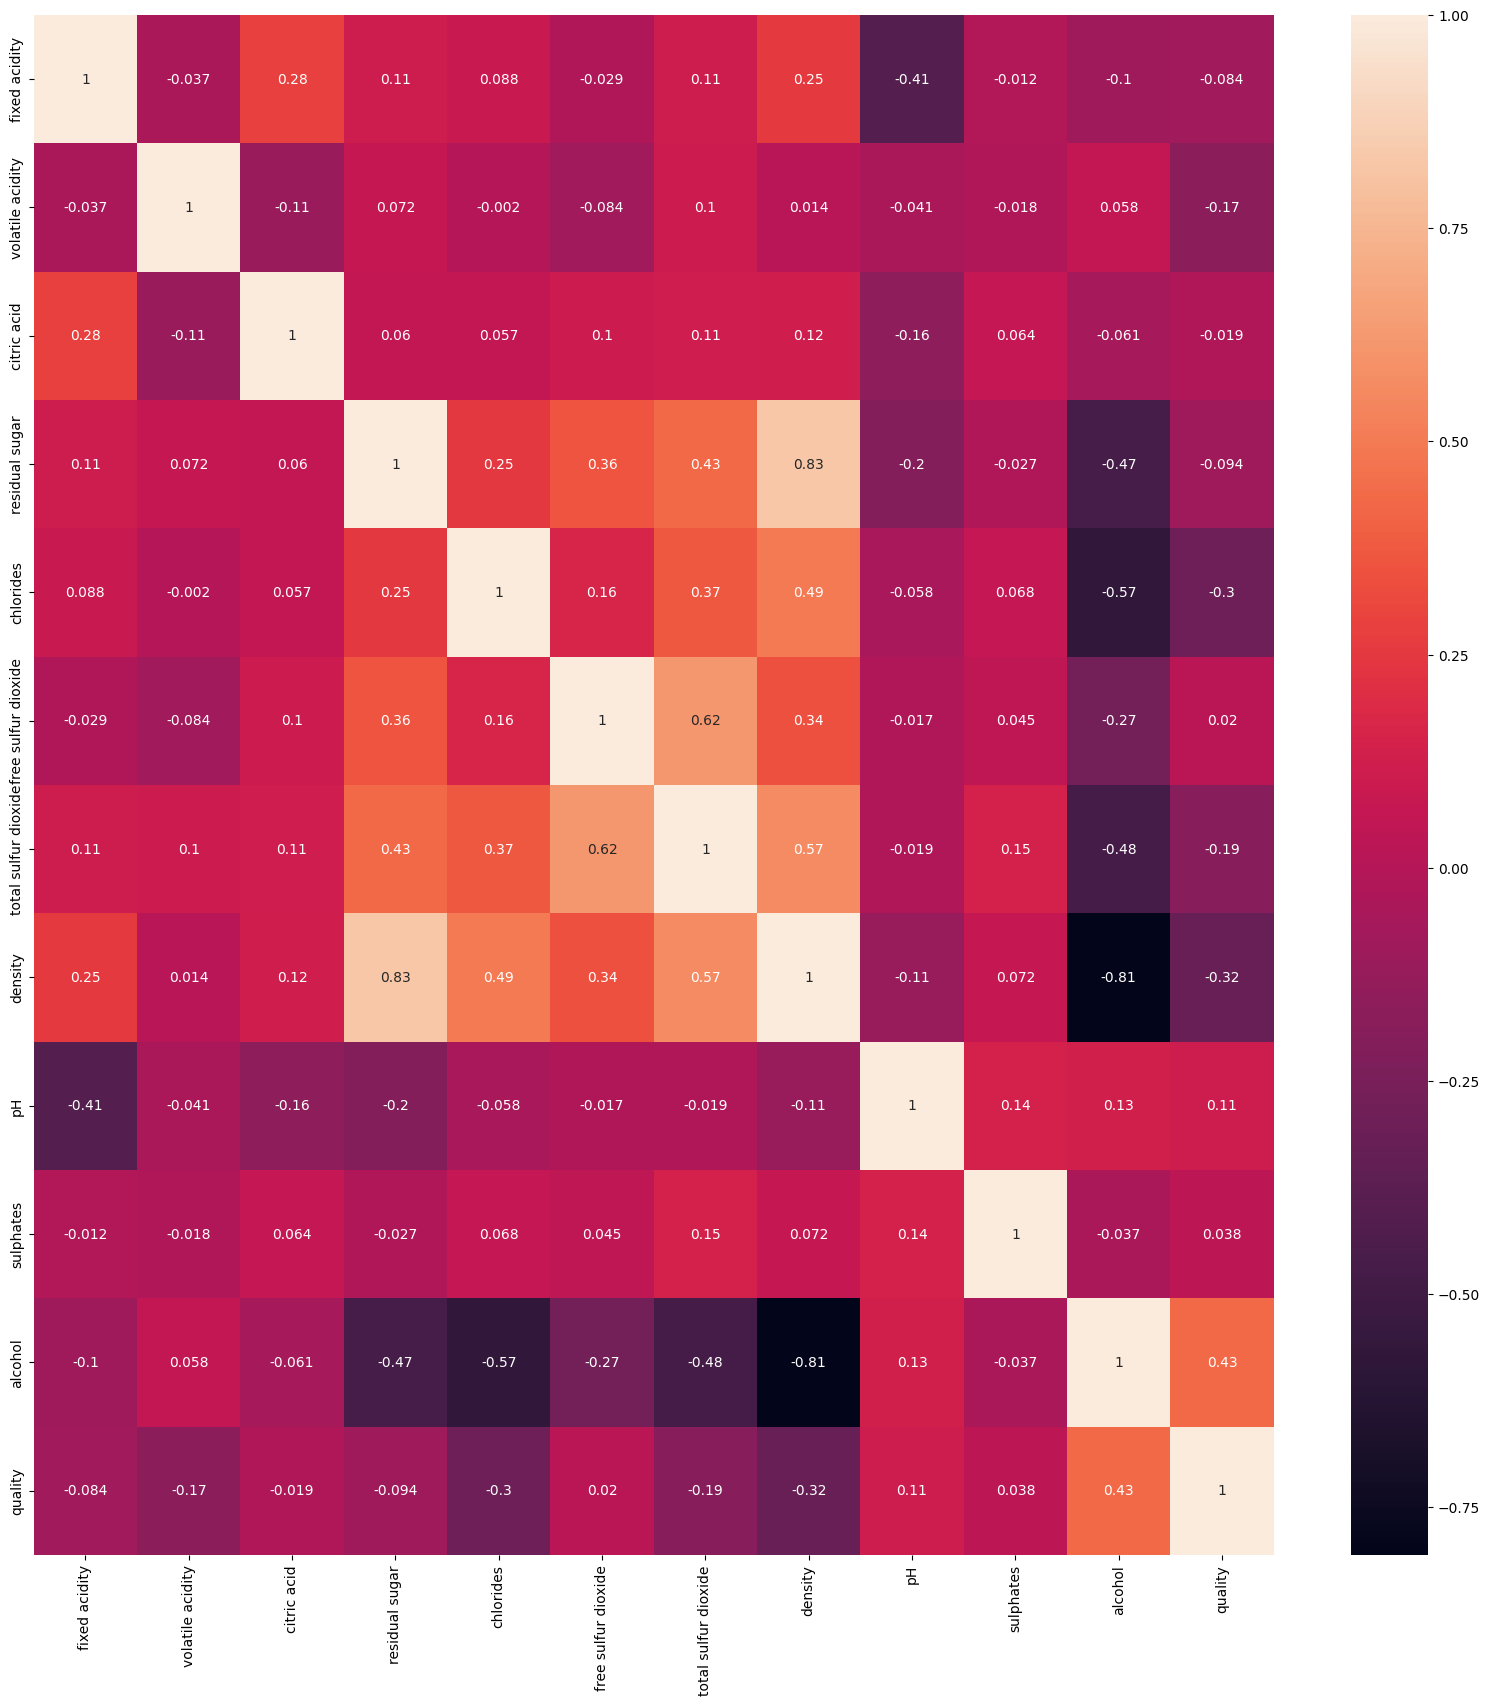

In [15]:
corr()

In [16]:
def scaling(features):
    for feature in features:
        scaler = MinMaxScaler()
        data[feature] = scaler.fit_transform(data[[feature]])

In [17]:
scaling(col)

In [18]:
data = data.drop('quality', axis = 1)

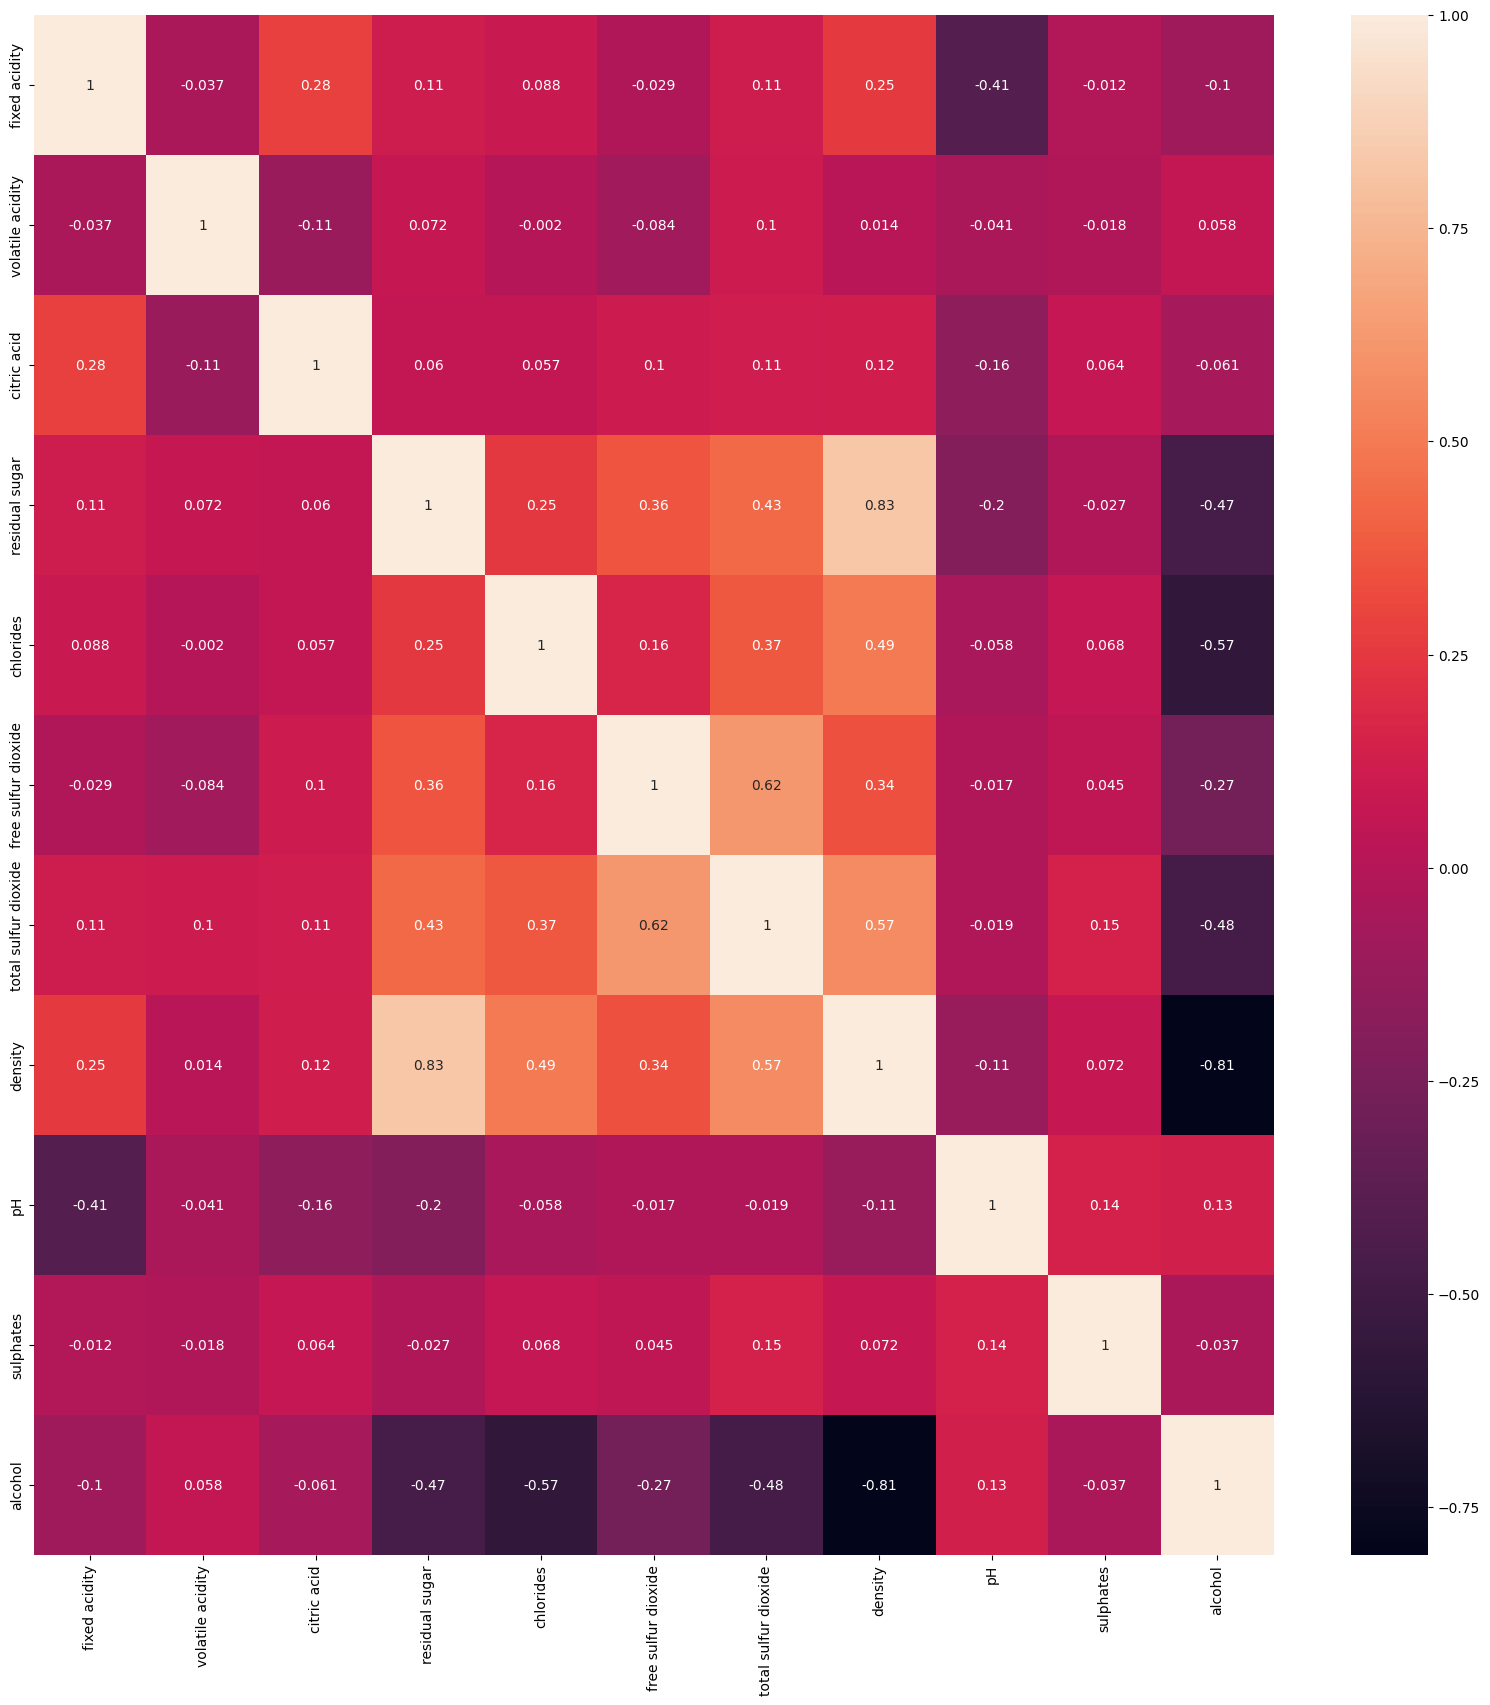

In [19]:
corr()

#### specify no of cluster (k)
#### randomly initialize the centroid, center of each cluster: more like selecting a random centroids for each features.
#### determine which data points belong to which cluster by finding the closest centroid to each point
#### update the centtoid based on the geometric mean of all the datapoints of the cluster
#### run 3 and 4 until the centroid stops changing. its called _iteration_

In [20]:
# wss is the inertia points for each increasing number of clusters.
# n_clusters is k

# 
def random_centroids(data, k):
    centroids = [] # list for centroids for all features
    for i in range(k): # iterate through k(centroid) given for all the feature
        centroid = data.apply(lambda x: float(x.sample())) # each random centroids to be chosen for all feature in each instances
        # x is the feature in this case.
        centroids.append(centroid) # add centroids to the list for all iteration in this case k
    return pd.concat(centroids, axis = 1)
    
centroids = random_centroids(data, 10)

### Using elbow method to find the number of clusters

In [21]:
# using the elbow method to find the best number of clusters
wss = []
for i in range(1, 11):
    kmeans =KMeans(n_clusters=i, random_state= 10, init= 'k-means++')
    kmeans.fit(data)
    wss.append(kmeans.inertia_)
    
    
# so from here we plot a graph to show the wss points of each increasing clusters

In [22]:
wss

[5696.606636721695,
 4288.743245901947,
 3908.2529981718353,
 3625.7465231607707,
 3449.4535025203595,
 3291.1009548105358,
 3162.974130278082,
 3056.4382014806924,
 2961.935320914258,
 2879.022907261605]

Text(0, 0.5, 'The wss values for each increasing number of clusters')

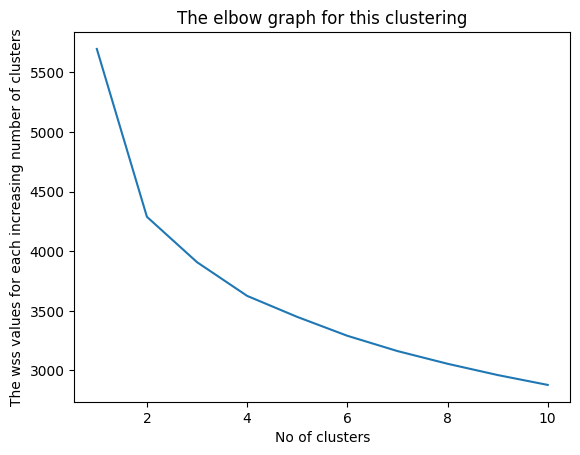

In [23]:
plt.plot(range(1, 11), wss)
plt.title('The elbow graph for this clustering')
plt.xlabel('No of clusters')
plt.ylabel('The wss values for each increasing number of clusters')


#### From the graph above we can deduce that max number of clusters to be chosen is 5

In [24]:
pca = PCA()
data = pca.fit_transform(data)

In [25]:
#Training the clustering model
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=10)

# a label for each datapoints(clusters)
label = kmeans.fit_predict(data)
print(label)

#you can install yellowbrick for the elbow method

[1 2 3 ... 3 0 0]


Text(0.5, 1.0, 'Cluster groups')

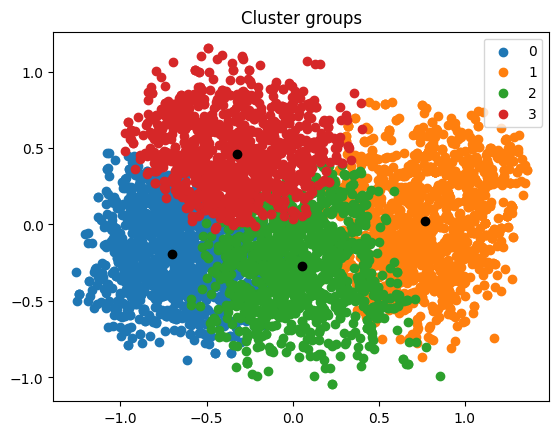

In [26]:
unique_label = np.unique(label)

for i in unique_label:
    plt.scatter(data[label == i, 0], data[label == i, 1], label = i)
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], color = 'black')
    
plt.legend()
plt.title('Cluster groups')

### Silhouette method finding clusters

In [27]:
#silhouette method starts from range 2
silhouette_coef = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coef.append(score)
    print(f'for clusters {i}, the silhouette score is {score}')

for clusters 2, the silhouette score is 0.22325848748248636
for clusters 3, the silhouette score is 0.16371202091567122
for clusters 4, the silhouette score is 0.14061171422484897
for clusters 5, the silhouette score is 0.12085849903700828
for clusters 6, the silhouette score is 0.1205107512058533
for clusters 7, the silhouette score is 0.11977249704668987
for clusters 8, the silhouette score is 0.1169049106023685
for clusters 9, the silhouette score is 0.1122505978324215


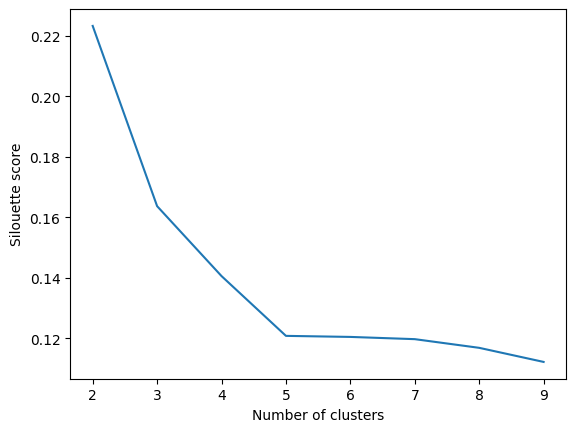

In [28]:
# plotting the graph for the silhouette values
plt.plot(range(2, 10), silhouette_coef)
plt.xticks(range(2, 10))
plt.xlabel('Number of clusters')
plt.ylabel('Silouette score')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(data)
print(label)

[3 2 4 ... 4 1 1]


Text(0.5, 1.0, 'cluster of silhouette clustering')

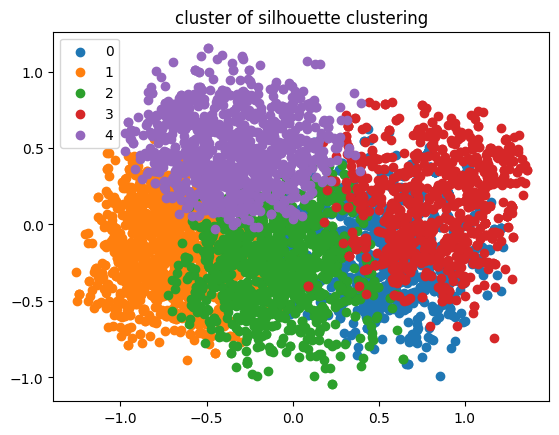

In [30]:
for i in np.unique(label):
    plt.scatter(data[label == i, 0], data[label == i, 1], label = i)
    
plt.legend()
plt.title('cluster of silhouette clustering')